# MECO

Feature extraction and data preparation for the MECO dataset

We chose the "joint_data_trimmed.dat" file in the MECO website (https://meco-read.com/).

Interesting paper that describe the dataset, https://link.springer.com/epdf/10.3758/s13428-021-01772-6?sharing_token=As4e3osuA15IaUCKtCvDT5AH0g46feNdnc402WrhzyoEtpF3alySPm1lAWocS1ewk9OZlpPc3CqibACC23iBC_nacc6BD4_GPYLuUZJAvfWHoa8e0hjmhhFn9fLIgIRd3VzSfjlcpQ3gS4EiUY2YpRXjDSh3hB5Zx5kZpkk4yIQ=.

## Import Libs and Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("joint_data_trimmed.csv", index_col=0)

We have chose to use the following features for each sample:

- **Skipping**: a binary index of whether the word was fixated at least once during the entire reading of the text [and not only during the first pass].
- **First Fixation**: the duration of the first fixation landing on the word.
- **Gaze Duration**: the summed duration of fixations on the word in the first pass, i.e., before the gaze leaves it for the first time.
- **Total Fixation Duration**: the summed duration of all fixations on the word.
- **First-run Number of Fixation**: the number of fixations on a word during the first pass.
- **Total Number of Fixations**: number of fixations on a word overall.
- **Regression**: a binary index of whether the gaze returned to the word after inspecting further textual material.
- **Rereading**: a binary index of whether the word elicited fixations after the first pass.


In [3]:
# following a paper cited on the MECO website, i will use a subset of the gaze features
gaze_features = ["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]
basic_features = ["trialid", "sentnum", "ianum", "ia", "lang", "uniform_id"]
df = df[basic_features + gaze_features]

In [4]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
1,1.0,1.0,1.0,Janus,du,du_1,0.0,154.0,154.0,400.0,1.0,2.0,0.0,1.0
2,1.0,1.0,2.0,is,du,du_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,3.0,in,du,du_1,0.0,551.0,551.0,551.0,1.0,1.0,0.0,0.0
4,1.0,1.0,4.0,de,du,du_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,5.0,oude,du,du_1,0.0,189.0,189.0,439.0,1.0,2.0,0.0,1.0


## Data Understanding

We can notice that there are some Null elements, for the gaze_features except skip, those Null elements are in the rows with skip == 1, representing the fact that cannot be captured.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855123 entries, 1 to 855123
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        855122 non-null  float64
 1   sentnum        855122 non-null  float64
 2   ianum          855122 non-null  float64
 3   ia             854741 non-null  object 
 4   lang           855122 non-null  object 
 5   uniform_id     855123 non-null  object 
 6   skip           855122 non-null  float64
 7   firstfix.dur   639530 non-null  float64
 8   firstrun.dur   639530 non-null  float64
 9   dur            639530 non-null  float64
 10  firstrun.nfix  639530 non-null  float64
 11  nfix           639530 non-null  float64
 12  refix          639454 non-null  float64
 13  reread         639530 non-null  float64
dtypes: float64(11), object(3)
memory usage: 97.9+ MB


In [6]:
df.describe()

,trialid,sentnum,ianum,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
count,855122.000000,855122.000000,855122.000000,855122.000000,639530.000000,639530.000000,639530.000000,639530.000000,639530.000000,639454.000000,639530.000000
mean,6.319812,5.100584,84.710652,0.252118,214.771812,274.000635,396.190598,1.291295,1.870305,0.270565,0.315846
std,3.440210,2.697842,51.443266,0.434229,94.834265,181.464901,332.095123,0.666067,1.378493,0.444252,0.464852
min,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,3.000000,41.000000,0.000000,156.000000,171.000000,199.000000,1.000000,1.000000,0.000000,0.000000
50%,6.000000,5.000000,82.000000,0.000000,200.000000,229.000000,297.000000,1.000000,1.000000,0.000000,0.000000
75%,9.000000,7.000000,124.000000,1.000000,255.000000,324.000000,478.000000,1.000000,2.000000,1.000000,1.000000
max,12.000000,16.000000,243.000000,1.000000,12688.000000,12688.000000,15579.000000,44.000000,50.000000,1.000000,1.000000


In [7]:
df.lang.unique()

array(['du', 'ee', 'fi', 'ge', 'gr', 'he', 'it', 'ko', 'en', 'no', nan,
       'ru', 'sp', 'tr'], dtype=object)

Get a subset of languages, choosen look a the ones handled by mBERT (https://huggingface.co/bert-base-multilingual-cased).

- **German**
- **Italian**
- **Russian**
- **English**
- **Spanish**

In [8]:
# get only the languages that are necessary to the project
supported_languages = ["ge", "it", "ru", "en", "sp"]

In [9]:
df = df[df.lang.isin(supported_languages)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402904 entries, 193910 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        402904 non-null  float64
 1   sentnum        402904 non-null  float64
 2   ianum          402904 non-null  float64
 3   ia             402834 non-null  object 
 4   lang           402904 non-null  object 
 5   uniform_id     402904 non-null  object 
 6   skip           402904 non-null  float64
 7   firstfix.dur   292582 non-null  float64
 8   firstrun.dur   292582 non-null  float64
 9   dur            292582 non-null  float64
 10  firstrun.nfix  292582 non-null  float64
 11  nfix           292582 non-null  float64
 12  refix          292539 non-null  float64
 13  reread         292582 non-null  float64
dtypes: float64(11), object(3)
memory usage: 46.1+ MB


In [11]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
193910,1.0,1.0,1.0,In,ge,ge_1,0.0,164.0,164.0,164.0,1.0,1.0,0.0,0.0
193911,1.0,1.0,2.0,der,ge,ge_1,0.0,166.0,166.0,657.0,1.0,3.0,0.0,1.0
193912,1.0,1.0,3.0,alten,ge,ge_1,0.0,144.0,144.0,717.0,1.0,3.0,0.0,1.0
193913,1.0,1.0,4.0,römischen,ge,ge_1,0.0,219.0,219.0,1231.0,1.0,6.0,0.0,1.0
193914,1.0,1.0,5.0,Religion,ge,ge_1,0.0,151.0,151.0,1338.0,1.0,8.0,1.0,1.0


Notice that in the samples' gaze_features with skip == 0 there aren't Null elements.

In [12]:
df[df.skip==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292582 entries, 193910 to 823178
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        292582 non-null  float64
 1   sentnum        292582 non-null  float64
 2   ianum          292582 non-null  float64
 3   ia             292575 non-null  object 
 4   lang           292582 non-null  object 
 5   uniform_id     292582 non-null  object 
 6   skip           292582 non-null  float64
 7   firstfix.dur   292582 non-null  float64
 8   firstrun.dur   292582 non-null  float64
 9   dur            292582 non-null  float64
 10  firstrun.nfix  292582 non-null  float64
 11  nfix           292582 non-null  float64
 12  refix          292539 non-null  float64
 13  reread         292582 non-null  float64
dtypes: float64(11), object(3)
memory usage: 33.5+ MB


In [13]:
df[df.skip==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 193926 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        110322 non-null  float64
 1   sentnum        110322 non-null  float64
 2   ianum          110322 non-null  float64
 3   ia             110259 non-null  object 
 4   lang           110322 non-null  object 
 5   uniform_id     110322 non-null  object 
 6   skip           110322 non-null  float64
 7   firstfix.dur   0 non-null       float64
 8   firstrun.dur   0 non-null       float64
 9   dur            0 non-null       float64
 10  firstrun.nfix  0 non-null       float64
 11  nfix           0 non-null       float64
 12  refix          0 non-null       float64
 13  reread         0 non-null       float64
dtypes: float64(11), object(3)
memory usage: 12.6+ MB


Even more, there are some ia elements that are Null, we can see that most of them are not skipped words with a lot of Null elements, so we can drop them.

In [14]:
print("Probabilities of Null elements by columns, for the Null ia")
df[df.ia.isna()].isna().sum()/df[df.ia.isna()].shape[0]

Probabilities of Null elements by columns, for the Null ia


trialid          0.0
sentnum          0.0
ianum            0.0
ia               1.0
lang             0.0
uniform_id       0.0
skip             0.0
firstfix.dur     0.9
firstrun.dur     0.9
dur              0.9
firstrun.nfix    0.9
nfix             0.9
refix            0.9
reread           0.9
dtype: float64

In [15]:
df = df[~df.ia.isna()]

Fill gaze features of the skipped words with 0.

In [16]:
df = df.fillna(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402834 entries, 193910 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        402834 non-null  float64
 1   sentnum        402834 non-null  float64
 2   ianum          402834 non-null  float64
 3   ia             402834 non-null  object 
 4   lang           402834 non-null  object 
 5   uniform_id     402834 non-null  object 
 6   skip           402834 non-null  float64
 7   firstfix.dur   402834 non-null  float64
 8   firstrun.dur   402834 non-null  float64
 9   dur            402834 non-null  float64
 10  firstrun.nfix  402834 non-null  float64
 11  nfix           402834 non-null  float64
 12  refix          402834 non-null  float64
 13  reread         402834 non-null  float64
dtypes: float64(11), object(3)
memory usage: 46.1+ MB


In [18]:
df[["skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]].corr()

,skip,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
skip,1.000000,-0.652214,-0.543305,-0.741110,-0.587836,-0.287592,-0.333861
firstrun.dur,-0.652214,1.000000,0.720569,0.860484,0.616886,0.554956,0.224649
dur,-0.543305,0.720569,1.000000,0.648870,0.923882,0.555678,0.629876
firstrun.nfix,-0.741110,0.860484,0.648870,1.000000,0.712458,0.682079,0.256612
nfix,-0.587836,0.616886,0.923882,0.712458,1.000000,0.631961,0.685371
refix,-0.287592,0.554956,0.555678,0.682079,0.631961,1.000000,0.249470
reread,-0.333861,0.224649,0.629876,0.256612,0.685371,0.249470,1.000000


# Clustering Users

We need to cluster users to handle separate readers behaviours, since the fact that the grouped features have different correlation matrix wrt to non grouped data.

## Profiling the Users

First of all we have to see if each trial havethe same users

In [19]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
193910,1.0,1.0,1.0,In,ge,ge_1,0.0,164.0,164.0,164.0,1.0,1.0,0.0,0.0
193911,1.0,1.0,2.0,der,ge,ge_1,0.0,166.0,166.0,657.0,1.0,3.0,0.0,1.0
193912,1.0,1.0,3.0,alten,ge,ge_1,0.0,144.0,144.0,717.0,1.0,3.0,0.0,1.0
193913,1.0,1.0,4.0,römischen,ge,ge_1,0.0,219.0,219.0,1231.0,1.0,6.0,0.0,1.0
193914,1.0,1.0,5.0,Religion,ge,ge_1,0.0,151.0,151.0,1338.0,1.0,8.0,1.0,1.0


In [21]:
# not all the readers appear in all the trial

trial_readers = df.groupby("trialid").uniform_id.unique()

for trial in trial_readers:
    print(len(trial))

188
190
200
198
191
187
197
183
194
186
203
182


In [28]:
trial_readers.loc[12]

array(['ge_1', 'ge_2', 'ge_3', 'ge_4', 'ge_6', 'ge_8', 'ge_9', 'ge_10',
       'ge_11', 'ge_12', 'ge_13', 'ge_15', 'ge_16', 'ge_17', 'ge_18',
       'ge_19', 'ge_22', 'ge_23', 'ge_24', 'ge_26', 'ge_28', 'ge_29',
       'ge_30', 'ge_31', 'ge_32', 'ge_35', 'ge_36', 'ge_37', 'ge_39',
       'ge_40', 'ge_41', 'ge_45', 'ge_46', 'ge_47', 'ge_48', 'ge_50',
       'ge_51', 'ge_52', 'ge_53', 'it_3', 'it_4', 'it_5', 'it_6', 'it_7',
       'it_8', 'it_10', 'it_11', 'it_13', 'it_14', 'it_15', 'it_17',
       'it_19', 'it_2', 'it_20', 'it_21', 'it_24', 'it_26', 'it_29',
       'it_31', 'it_32', 'it_34', 'it_35', 'it_36', 'it_37', 'it_38',
       'it_39', 'it_40', 'it_41', 'it_44', 'it_46', 'it_48', 'it_49',
       'it_50', 'it_51', 'it_52', 'it_54', 'it_55', 'it_57', 'it_58',
       'it_59', 'en_3', 'en_6', 'en_101', 'en_102', 'en_11', 'en_14',
       'en_17', 'en_18', 'en_27', 'en_36', 'en_39', 'en_49', 'en_52',
       'en_55', 'en_72', 'en_74', 'en_76', 'en_78', 'en_79', 'en_82',
       'en_83', 

In [29]:
sets_trial_readers = []
for trial in trial_readers.values:
    sets_trial_readers.append(set(trial))

In [31]:
common_users = set.intersection(*sets_trial_readers)

In [33]:
common_users

{'en_101',
 'en_102',
 'en_3',
 'en_6',
 'en_72',
 'en_74',
 'en_76',
 'en_78',
 'en_79',
 'en_82',
 'en_83',
 'en_84',
 'en_85',
 'en_86',
 'en_87',
 'en_88',
 'en_89',
 'en_90',
 'en_91',
 'en_93',
 'en_94',
 'en_95',
 'en_97',
 'en_98',
 'en_99',
 'ge_1',
 'ge_10',
 'ge_12',
 'ge_13',
 'ge_17',
 'ge_3',
 'ge_30',
 'ge_32',
 'ge_37',
 'ge_39',
 'ge_41',
 'ge_47',
 'ge_53',
 'ge_6',
 'ge_8',
 'ge_9',
 'it_11',
 'it_13',
 'it_17',
 'it_21',
 'it_26',
 'it_3',
 'it_36',
 'it_37',
 'it_48',
 'ru_1',
 'ru_13',
 'ru_21',
 'ru_22',
 'ru_35',
 'ru_42',
 'ru_51',
 'ru_52',
 'sp_18',
 'sp_34',
 'sp_37',
 'sp_38',
 'sp_4',
 'sp_42',
 'sp_48',
 'sp_51',
 'sp_54',
 'sp_56',
 'sp_61'}

In [40]:
len(set(common_users))

69

In [42]:
df = df[df.uniform_id.isin(common_users)]

In [43]:
len(df.uniform_id.unique())

69

The trials doesn't contain the same readers

In [44]:
reader_grouped_df = df.groupby(["uniform_id", "lang"])[gaze_features].mean().reset_index(level=0).reset_index(level=0)

In [45]:
reader_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lang           69 non-null     object 
 1   uniform_id     69 non-null     object 
 2   skip           69 non-null     float64
 3   firstfix.dur   69 non-null     float64
 4   firstrun.dur   69 non-null     float64
 5   dur            69 non-null     float64
 6   firstrun.nfix  69 non-null     float64
 7   nfix           69 non-null     float64
 8   refix          69 non-null     float64
 9   reread         69 non-null     float64
dtypes: float64(8), object(2)
memory usage: 5.5+ KB


In [46]:
reader_grouped_df.uniform_id.unique()

array(['en_101', 'en_102', 'en_3', 'en_6', 'en_72', 'en_74', 'en_76',
       'en_78', 'en_79', 'en_82', 'en_83', 'en_84', 'en_85', 'en_86',
       'en_87', 'en_88', 'en_89', 'en_90', 'en_91', 'en_93', 'en_94',
       'en_95', 'en_97', 'en_98', 'en_99', 'ge_1', 'ge_10', 'ge_12',
       'ge_13', 'ge_17', 'ge_3', 'ge_30', 'ge_32', 'ge_37', 'ge_39',
       'ge_41', 'ge_47', 'ge_53', 'ge_6', 'ge_8', 'ge_9', 'it_11',
       'it_13', 'it_17', 'it_21', 'it_26', 'it_3', 'it_36', 'it_37',
       'it_48', 'ru_1', 'ru_13', 'ru_21', 'ru_22', 'ru_35', 'ru_42',
       'ru_51', 'ru_52', 'sp_18', 'sp_34', 'sp_37', 'sp_38', 'sp_4',
       'sp_42', 'sp_48', 'sp_51', 'sp_54', 'sp_56', 'sp_61'], dtype=object)

In [47]:
reader_grouped_df[gaze_features].corr()

,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
skip,1.000000,-0.635364,-0.728137,-0.528128,-0.902767,-0.632678,-0.725183,-0.335440
firstfix.dur,-0.635364,1.000000,0.907218,0.664989,0.554833,0.433252,0.421090,0.250150
firstrun.dur,-0.728137,0.907218,1.000000,0.672760,0.799756,0.525950,0.728023,0.222922
dur,-0.528128,0.664989,0.672760,1.000000,0.505260,0.913355,0.573284,0.827466
firstrun.nfix,-0.902767,0.554833,0.799756,0.505260,1.000000,0.612257,0.929224,0.237694
nfix,-0.632678,0.433252,0.525950,0.913355,0.612257,1.000000,0.685368,0.888236
refix,-0.725183,0.421090,0.728023,0.573284,0.929224,0.685368,1.000000,0.347515
reread,-0.335440,0.250150,0.222922,0.827466,0.237694,0.888236,0.347515,1.000000


### Apply K-means to clusterize our datas

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm
import matplotlib.pyplot as plt

In [49]:
scaler = MinMaxScaler()

X = scaler.fit_transform(reader_grouped_df[gaze_features].values)

In [50]:
X

array([[0.51823053, 0.39750317, 0.38063266, 0.24395154, 0.41151823,
        0.25663776, 0.43381278, 0.33186002],
       [0.46425476, 0.63885025, 0.56303709, 0.27943116, 0.40062454,
        0.19793074, 0.30931981, 0.28274558],
       [0.25606251, 0.76473012, 0.78056681, 0.3212555 , 0.68775102,
        0.28390452, 0.58218112, 0.22453587],
       [0.42107414, 0.35447945, 0.41897052, 0.3796907 , 0.56714234,
        0.51595025, 0.75613021, 0.55014643],
       [0.66319402, 0.39028178, 0.34048378, 0.31988646, 0.28390646,
        0.30198962, 0.30761443, 0.40553168],
       [0.85904895, 0.17866376, 0.1391035 , 0.10719549, 0.13606356,
        0.07884732, 0.17971069, 0.18542622],
       [0.61538691, 0.30633843, 0.25414038, 0.17714956, 0.2776815 ,
        0.16649049, 0.25474755, 0.28092652],
       [0.6508567 , 0.35739893, 0.22171499, 0.10966679, 0.1866414 ,
        0.06131869, 0.07568232, 0.15450231],
       [0.72179628, 0.57830494, 0.44912213, 0.23143284, 0.1983132 ,
        0.1105658 , 0.150719

In [51]:
sse_list = list()
separations = list()
silouettes_ = list()

max_k = 7
for k in tqdm(range(2, max_k + 1)):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    separations.append(metrics.davies_bouldin_score(X, kmeans.labels_))
    silouettes_.append(silhouette_score(X, kmeans.labels_))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 31.56it/s]


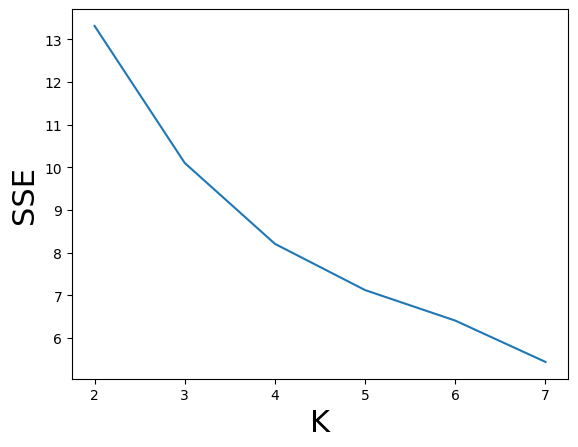

In [52]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(sse_list) + 2))
plt.show()

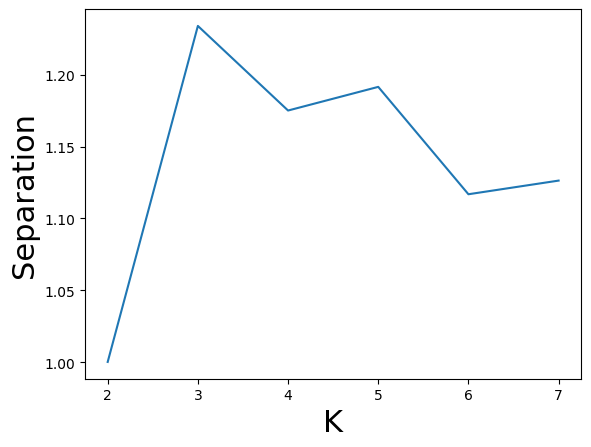

In [53]:
plt.plot(range(2, len(separations) + 2), separations)
plt.ylabel('Separation', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(separations) + 2))
plt.show()

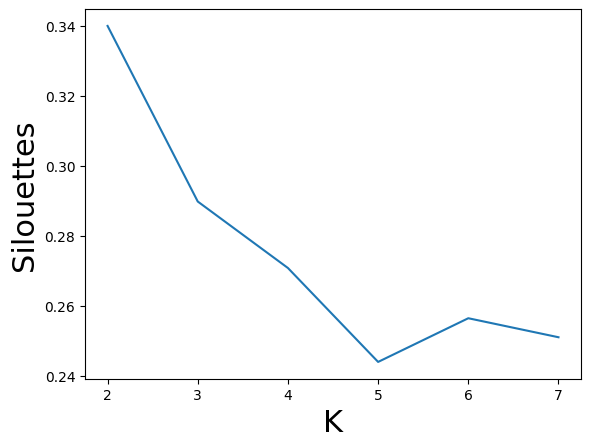

In [54]:
plt.plot(range(2, len(silouettes_) + 2), silouettes_)
plt.ylabel('Silouettes', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(silouettes_) + 2))
plt.show()

In [61]:
selected_k=3

kmeans = KMeans(n_clusters=selected_k, n_init=100, max_iter=500)
kmeans.fit(X)

KMeans(max_iter=500, n_clusters=3, n_init=100)

In [62]:
# sum up the metrics

print(f"SSE : {kmeans.inertia_}")
print(f"Separation : {metrics.davies_bouldin_score(X, kmeans.labels_)}")
print(f"Silhouette : {silhouette_score(X, kmeans.labels_)}")

SSE : 10.085880701060173
Separation : 1.2495820540173554
Silhouette : 0.27225889238923057


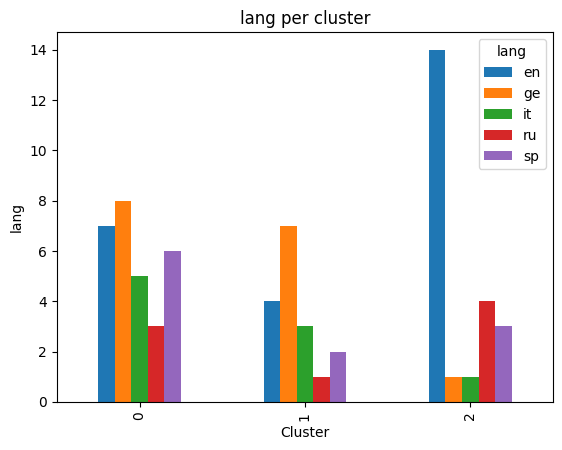

In [63]:
bot_xt_pct = pd.crosstab(kmeans.labels_, reader_grouped_df["lang"])
bot_xt_pct.plot(kind='bar', stacked=False, 
                   title=f'lang per cluster')
plt.xlabel('Cluster')
plt.ylabel("lang")
plt.show()

In [65]:
center = scaler.inverse_transform(kmeans.cluster_centers_)

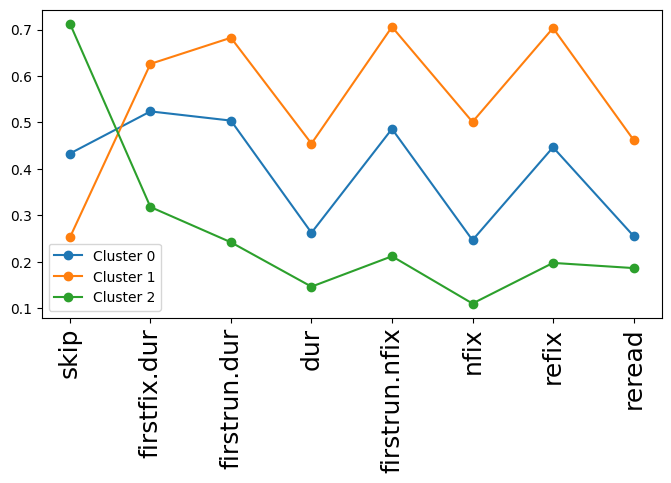

In [66]:
plt.figure(figsize=(8, 4))
for i in range(0, len(center)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(gaze_features)), gaze_features, fontsize=18, rotation=90)
plt.legend(fontsize=10)
plt.show()

In [67]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

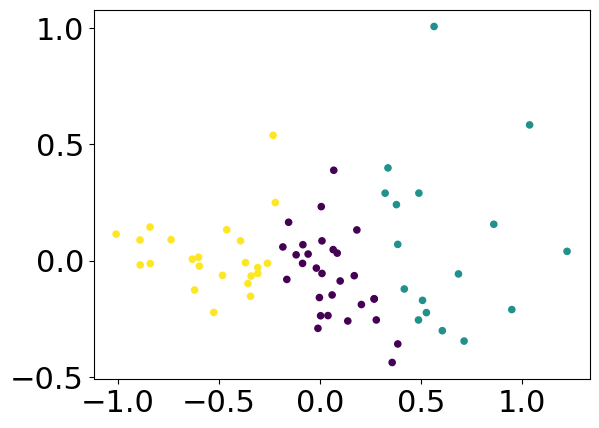

In [68]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

### Creating one dataset per cluster

In [69]:
readers_clusters = list()

for i in range(selected_k):
    readers_clusters.append(set(reader_grouped_df.loc[kmeans.labels_ == i, "uniform_id"]))
    
print(readers_clusters)

[{'sp_18', 'sp_37', 'sp_4', 'en_94', 'ru_35', 'ge_10', 'ge_9', 'en_86', 'sp_54', 'ge_8', 'en_101', 'ge_1', 'sp_38', 'it_13', 'sp_48', 'en_102', 'it_26', 'ge_12', 'ge_39', 'ru_42', 'it_11', 'ge_32', 'it_48', 'ge_37', 'it_17', 'en_90', 'en_88', 'ru_52', 'en_87'}, {'en_98', 'it_3', 'ge_6', 'ge_47', 'ge_13', 'it_36', 'it_37', 'en_91', 'ge_30', 'sp_34', 'ge_17', 'ge_3', 'ru_51', 'ge_53', 'en_3', 'sp_51', 'en_6'}, {'en_78', 'ru_21', 'en_99', 'sp_56', 'ru_13', 'sp_42', 'it_21', 'en_74', 'sp_61', 'en_85', 'en_82', 'en_84', 'en_97', 'en_72', 'ru_22', 'ge_41', 'en_89', 'en_76', 'en_93', 'en_95', 'en_83', 'en_79', 'ru_1'}]


In [70]:
df.uniform_id.isin(readers_clusters[0])

193910     True
193911     True
193912     True
193913     True
193914     True
          ...  
821161    False
821162    False
821163    False
821164    False
821165    False
Name: uniform_id, Length: 145293, dtype: bool

In [71]:
clustered_dfs = list()

for readers_cluster in readers_clusters:
    clustered_df = df[df.uniform_id.isin(readers_cluster)]
    clustered_dfs.append(clustered_df)

In [72]:
clustered_dfs

[        trialid  sentnum  ianum                ia lang uniform_id  skip  \
 193910      1.0      1.0    1.0                In   ge       ge_1   0.0   
 193911      1.0      1.0    2.0               der   ge       ge_1   0.0   
 193912      1.0      1.0    3.0             alten   ge       ge_1   0.0   
 193913      1.0      1.0    4.0         römischen   ge       ge_1   0.0   
 193914      1.0      1.0    5.0          Religion   ge       ge_1   0.0   
 ...         ...      ...    ...               ...  ...        ...   ...   
 807088     12.0      8.0  172.0         distintos   sp      sp_54   1.0   
 807089     12.0      8.0  173.0         gobiernos   sp      sp_54   0.0   
 807090     12.0      8.0  174.0                 y   sp      sp_54   1.0   
 807091     12.0      8.0  175.0    organizaciones   sp      sp_54   0.0   
 807092     12.0      8.0  176.0  internacionales.   sp      sp_54   0.0   
 
         firstfix.dur  firstrun.dur     dur  firstrun.nfix  nfix  refix  reread  
 193

### Mean gaze features inside each clustered dataset

In [73]:
group_by_cols = ["trialid", "sentnum", "ianum", "ia", "lang"]
grouped_cols = ["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]

for i in range(len(clustered_dfs)):
    grouped_clusterd_df = clustered_dfs[i].groupby(group_by_cols)[grouped_cols].mean()
    
    grouped_clusterd_df = grouped_clusterd_df.reset_index(level=0).reset_index(level=0).reset_index(level=0).reset_index(level=0).reset_index(level=0)
    
    grouped_clusterd_df["trial_sentnum"] = grouped_clusterd_df["sentnum"]
    grouped_clusterd_df["sentnum"] = grouped_clusterd_df["sentnum"].astype("string") + grouped_clusterd_df["trialid"].astype("string") + grouped_clusterd_df["lang"].astype("string")
    grouped_clusterd_df.sentnum = grouped_clusterd_df.sentnum.astype('category').cat.codes
    
    grouped_clusterd_df.rename(columns={"skip" : "prob_skip", "refix" : "prob_refix", "reread" : "prob_reread"}, inplace=True)
    
    grouped_clusterd_df.ianum = grouped_clusterd_df.ianum.astype(int)
    grouped_clusterd_df.trialid = grouped_clusterd_df.trialid.astype(int)
    grouped_clusterd_df.trial_sentnum = grouped_clusterd_df.trial_sentnum.astype(int)
    
    clustered_dfs[i] = grouped_clusterd_df

In [74]:
for clustered_df in clustered_dfs:
    print(clustered_df[["prob_skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "prob_refix", "prob_reread"]].corr())

               prob_skip  firstrun.dur       dur  firstrun.nfix      nfix  \
prob_skip       1.000000     -0.783383 -0.702896      -0.832626 -0.748956   
firstrun.dur   -0.783383      1.000000  0.883981       0.932176  0.840828   
dur            -0.702896      0.883981  1.000000       0.829165  0.958916   
firstrun.nfix  -0.832626      0.932176  0.829165       1.000000  0.877740   
nfix           -0.748956      0.840828  0.958916       0.877740  1.000000   
prob_refix     -0.499622      0.759429  0.736752       0.824339  0.788449   
prob_reread    -0.472787      0.446552  0.712010       0.441667  0.741436   

               prob_refix  prob_reread  
prob_skip       -0.499622    -0.472787  
firstrun.dur     0.759429     0.446552  
dur              0.736752     0.712010  
firstrun.nfix    0.824339     0.441667  
nfix             0.788449     0.741436  
prob_refix       1.000000     0.396716  
prob_reread      0.396716     1.000000  
               prob_skip  firstrun.dur       dur  first

In [75]:
for i, clustered_df in enumerate(clustered_dfs):
    print(f"Len dataset_{i} : {clustered_df.shape}")

Len dataset_0 : (10489, 14)
Len dataset_1 : (10489, 14)
Len dataset_2 : (10489, 14)


### Saving datasets

In [51]:
for i, clustered_df in enumerate(clustered_dfs):
    clustered_df.to_csv(f"datasets/cluster_{i}_dataset.csv")

### see distribution of data based on trial id

we can use last twe trial to compute validation and test set

In [53]:
for i, clustered_df in enumerate(clustered_dfs):
    
    print(f"\t--- Cluster {i} ---")
    
    for trial in df.trialid.unique():
        print(f"Percentage of samples in {trial}-th trial : {np.sum(clustered_df.trialid == trial)/clustered_df.shape[0]:.2f}%")

    print()

	--- Cluster 0 ---
Percentage of samples in 1.0-th trial : 0.09%
Percentage of samples in 2.0-th trial : 0.09%
Percentage of samples in 3.0-th trial : 0.10%
Percentage of samples in 4.0-th trial : 0.08%
Percentage of samples in 5.0-th trial : 0.07%
Percentage of samples in 6.0-th trial : 0.08%
Percentage of samples in 7.0-th trial : 0.09%
Percentage of samples in 8.0-th trial : 0.06%
Percentage of samples in 9.0-th trial : 0.08%
Percentage of samples in 10.0-th trial : 0.09%
Percentage of samples in 11.0-th trial : 0.09%
Percentage of samples in 12.0-th trial : 0.08%

	--- Cluster 1 ---
Percentage of samples in 1.0-th trial : 0.08%
Percentage of samples in 2.0-th trial : 0.08%
Percentage of samples in 3.0-th trial : 0.09%
Percentage of samples in 4.0-th trial : 0.09%
Percentage of samples in 5.0-th trial : 0.08%
Percentage of samples in 6.0-th trial : 0.08%
Percentage of samples in 7.0-th trial : 0.10%
Percentage of samples in 8.0-th trial : 0.07%
Percentage of samples in 9.0-th trial 